In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [165]:
ibm=pd.read_csv("IBM.csv")
google=pd.read_csv("GOOGL.csv")
tesla=pd.read_csv("TSLA.csv")

In [166]:
ibm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-10,129.830002,131.080002,129.240005,131.029999,125.221962,2614400
1,2023-04-11,130.580002,131.100006,130.179993,130.419998,124.639008,3132400
2,2023-04-12,130.399994,130.889999,128.169998,128.539993,122.842331,3957500
3,2023-04-13,128.009995,128.389999,126.000000,127.900002,122.230705,5621500
4,2023-04-14,128.460007,129.839996,127.309998,128.139999,122.460060,4180600


Եկեք գրաֆիկի տեսքով պատկերենք բաժնետոմսերի բացման գները։

Ասեմ, որ վերցրել եմ մեկ տարվա տվյալներ։ x-երի առանցքի թվերը դրանք օրերն են (առաջին օր, երկրորդ օր, ․․․․), և y-ների առանցքում հմպտ․ գներն են։

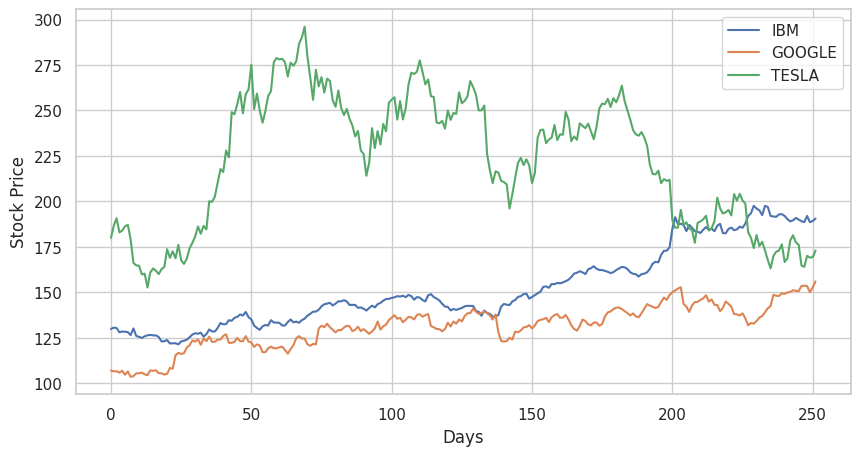

In [167]:
ibm['Open'].plot(label='IBM', figsize=(10,5))
google['Open'].plot(label='GOOGLE')
tesla['Open'].plot(label='TESLA')
plt.ylabel("Stock Price")
plt.xlabel("Days")
plt.legend()

## Volume

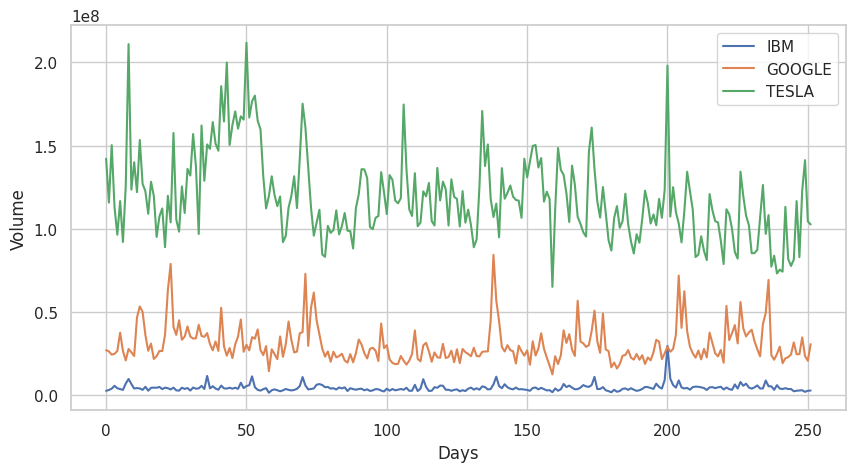

In [168]:
ibm['Volume'].plot(label='IBM', figsize=(10,5))
google['Volume'].plot(label='GOOGLE')
tesla['Volume'].plot(label='TESLA')
plt.ylabel("Volume")
plt.xlabel("Days")
plt.legend()

##Total Traded

Հիմա ընկերության հմպտ․ աղյուսակում ավելացնենք սյուն "Total Traded" վերնագրով։ Դա կարելի է ասել՝ այն գումարն է, որը ստացվել է բաժնետոմների այդ օրվա ընդհանուր վաճառքից։ Այսինքն դա լինելու է արտադրյալը բացման գնի և ծավալի։

Հ․Գ․ բացման գնի փոխարեն կարելի էր վերցնել նաև փակման գին։ Երկու ձևն էլ ընդունված է։ Էական տարբերություն չկա։

In [169]:
ibm['Total Traded']=ibm['Open']*ibm['Volume']
google['Total Traded']=google['Open']*google['Volume']
tesla['Total Traded']=tesla['Open']*tesla['Volume']

In [170]:
ibm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded
0,2023-04-10,129.830002,131.080002,129.240005,131.029999,125.221962,2614400,3.394276e+08
1,2023-04-11,130.580002,131.100006,130.179993,130.419998,124.639008,3132400,4.090288e+08
2,2023-04-12,130.399994,130.889999,128.169998,128.539993,122.842331,3957500,5.160580e+08
3,2023-04-13,128.009995,128.389999,126.000000,127.900002,122.230705,5621500,7.196082e+08
4,2023-04-14,128.460007,129.839996,127.309998,128.139999,122.460060,4180600,5.370399e+08


Գծենք մեր նոր սյան հմպտ․ գրաֆիկը։

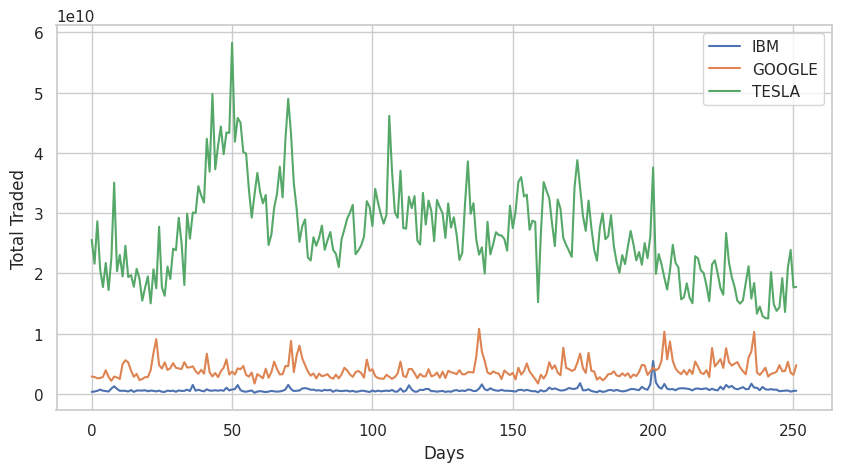

In [171]:
ibm['Total Traded'].plot(label='IBM', figsize=(10,5))
google['Total Traded'].plot(label='GOOGLE')
tesla['Total Traded'].plot(label='TESLA')
plt.ylabel("Total Traded")
plt.xlabel("Days")
plt.legend()



---



##Moving Average



In [172]:
tesla['MA_3']=tesla['Open'].rolling(3).mean()
tesla['MA_10']=tesla['Open'].rolling(10).mean()

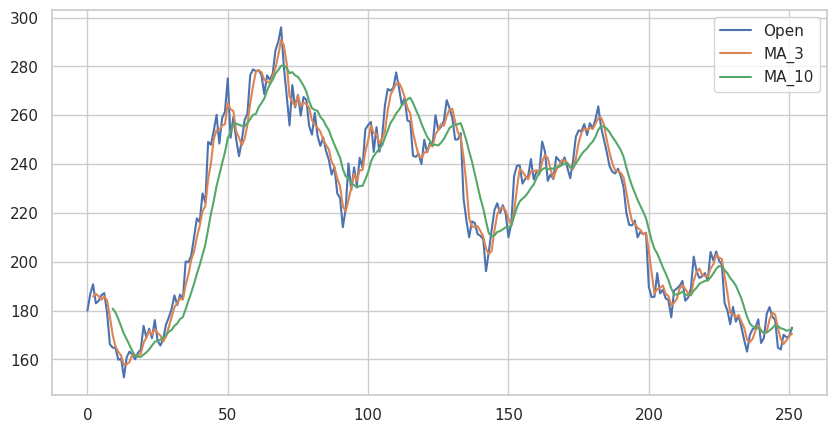

In [173]:
tesla['Open'].plot(figsize=(10,5));
tesla['MA_3'].plot(label='MA_3');
tesla['MA_10'].plot(label='MA_10');
plt.legend()

##Correlation (relation between stocks) & Scatter martix

Հիմա փորձենք գտնել կապը մեր 3 բաժնետոմսերի բացման գների։ Ստեղծենք մի աղյուսակ (DataFrame), որի ամեն սյունը կլինի մի բաժնետոմսի բացման գները։

In [174]:
from pandas.plotting import scatter_matrix

In [175]:
tech_comp=pd.concat([ibm['Open'], google['Open'], tesla['Open']], axis=1)
tech_comp.columns=['IBM Open', 'GOOGLE Open', 'TESLA Open']
tech_comp

,IBM Open,GOOGLE Open,TESLA Open
0,129.830002,106.980003,179.940002
1,130.580002,106.550003,186.690002
2,130.399994,106.580002,190.740005
3,128.009995,105.839996,182.960007
4,128.460007,106.889999,183.949997
...,...,...,...
247,188.600006,153.600006,164.020004
248,192.000000,153.500000,170.070007
249,188.589996,150.029999,169.080002
250,189.240005,152.779999,169.339996


In [176]:
sns.set_theme(style='white')

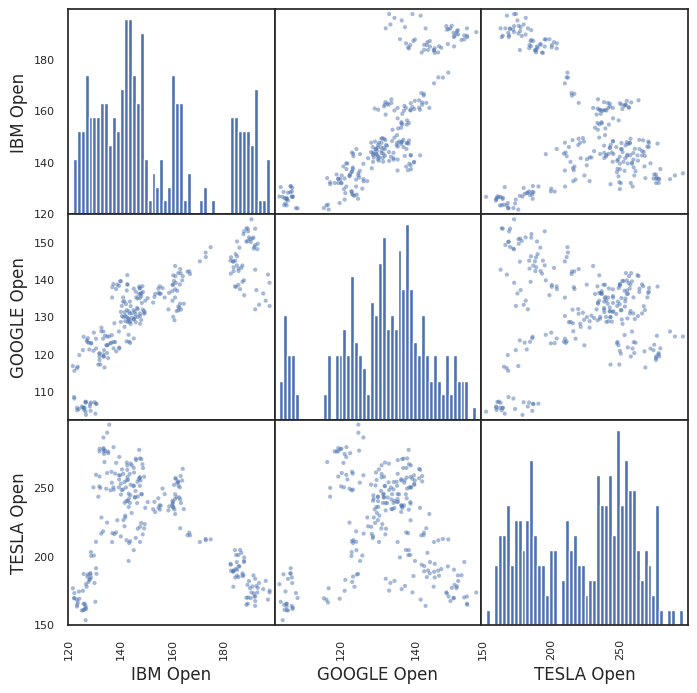

In [177]:
scatter_matrix(tech_comp, figsize=(8,8), hist_kwds={'bins':50});

###Daily Percentage Change

$r_t=\dfrac{p_t}{p_{t-1}}-1$

Տոկոսային փոփոխությունը (եկամտաբերություն) կարևոր տվայլ  է, երբ ուսումնասիրում ենք բաժնետոմսերի գները։ Այն ներկայացնում է ժամանակի ընթացքում գնի փոփոխության աստիճանը։

Սա հաշվելը ինչո՞ւ է անհրաժեշտ։ Եթե դուք ցանկանում եք ներդրում անել ինչ-որ բաժնետոմսում, դուք չեք ուզենա, որ վերջինս լինի անկայուն (ունենա գնային մեծ տատանումներ), հակառակ դեպքում մեծ ռիսկերի հետ գործ կունենաք։

Հիմա այդ ցուցանիշը կստանանք, հետո կգծենք, որ հասկանանք՝ որ ընկերության բաժնետոմսերն են ավելի կայուն։

In [178]:
ibm['Returns']=(ibm['Close']/ibm['Close'].shift(1))-1
google['Returns']=(google['Close']/google['Close'].shift(1))-1
tesla['Returns']=(tesla['Close']/tesla['Close'].shift(1))-1

Text(0, 0.5, 'Returns')

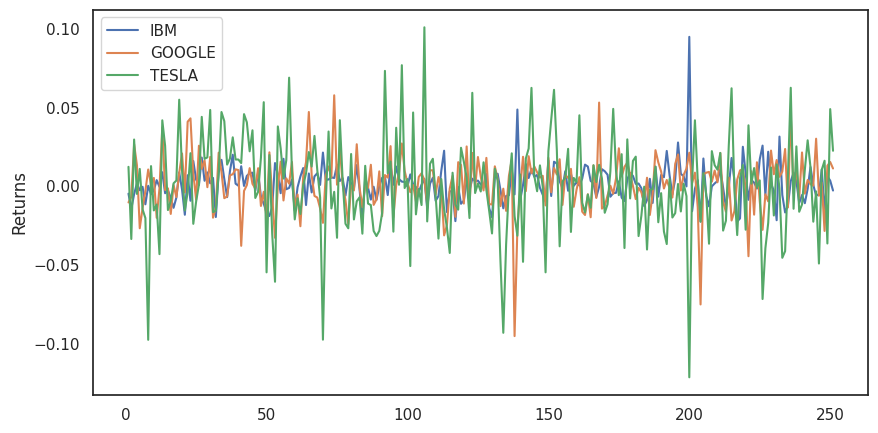

In [179]:
ibm['Returns'].plot(label='IBM', figsize=(10,5));
google['Returns'].plot(label='GOOGLE');
tesla['Returns'].plot(label='TESLA');
plt.legend()
plt.ylabel('Returns')

###Volatility

Text(0.5, 1.0, 'TESLA')

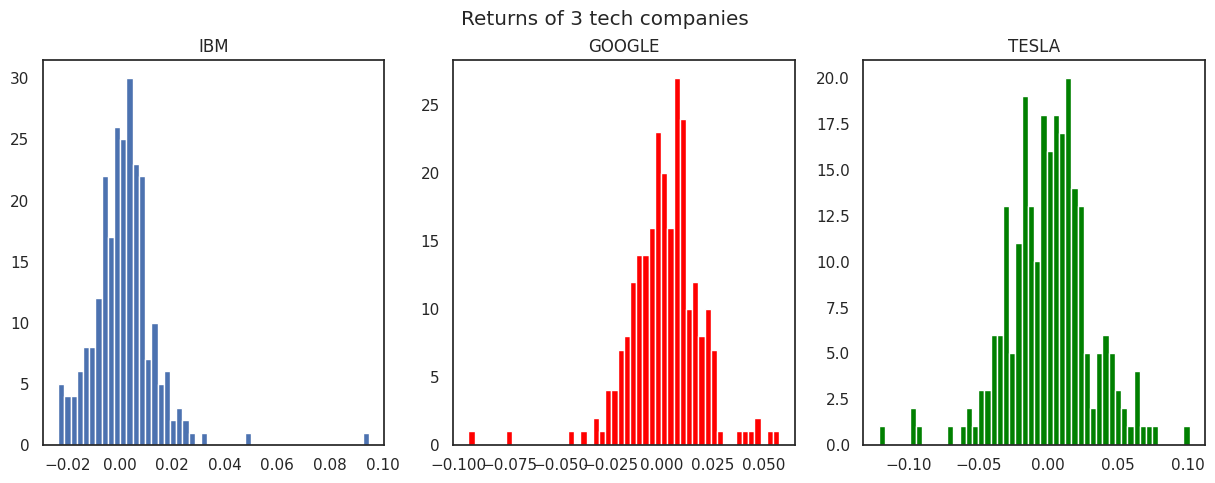

In [180]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Returns of 3 tech companies')
ax1.hist(ibm['Returns'], bins=50);
ax2.hist(google['Returns'], bins=50, color="red");
ax3.hist(tesla['Returns'], bins=50, color="green");
ax1.set_title('IBM')
ax2.set_title('GOOGLE')
ax3.set_title('TESLA')

Գծենք երեքն էլ նույն գրաֆիկում, որ ավելի պատկերավոր լինի։

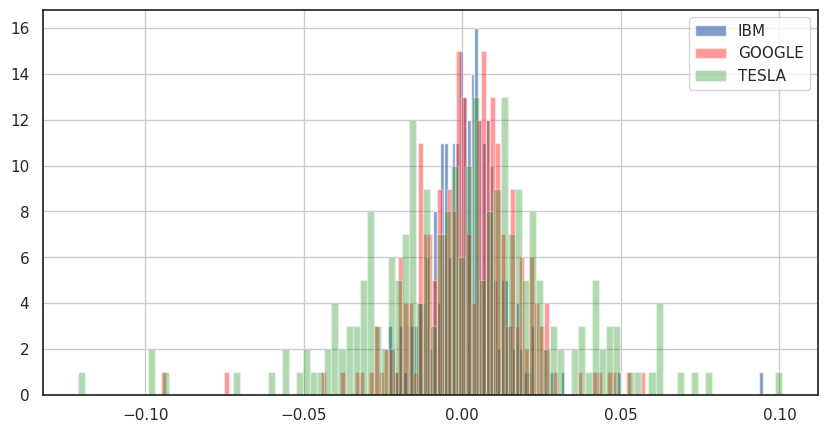

In [181]:
ibm['Returns'].hist(bins=100, label='IBM', alpha=0.7, figsize=(10,5));
google['Returns'].hist(bins=100, label='GOOGLE', color='Red', alpha=0.4);
tesla['Returns'].hist(bins=100, label='TESLA', color='Green', alpha=0.3);
plt.legend()

Կարող ենք նաև մոտարկենք յուրաքանչյուրի հիստոգրամը խտության ֆունկցիայով, որ ավելի տեսանելի լինի, ավելի հարթ։

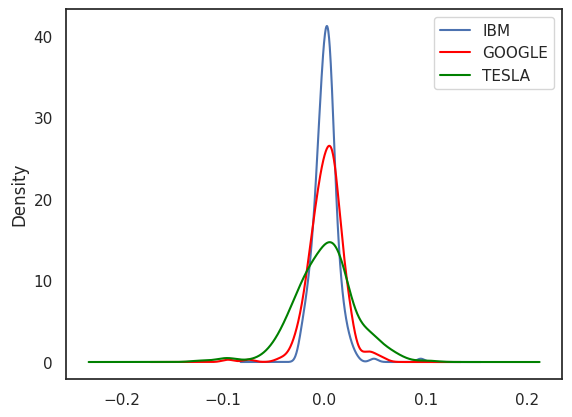

In [182]:
#kernel density estimation
ibm['Returns'].plot(label='IBM',  kind='kde');
google['Returns'].plot(label='GOOGLE', color='Red', kind='kde');
tesla['Returns'].plot(label='TESLA', color='Green', kind='kde');
plt.legend()

Սրա նման նաև այլ կերպ կարող ենք եզրակացություն անել բաժնետոմսի գնի կայունության վերաբերյալ։ Կարող ենք գծել boxplot-ը։

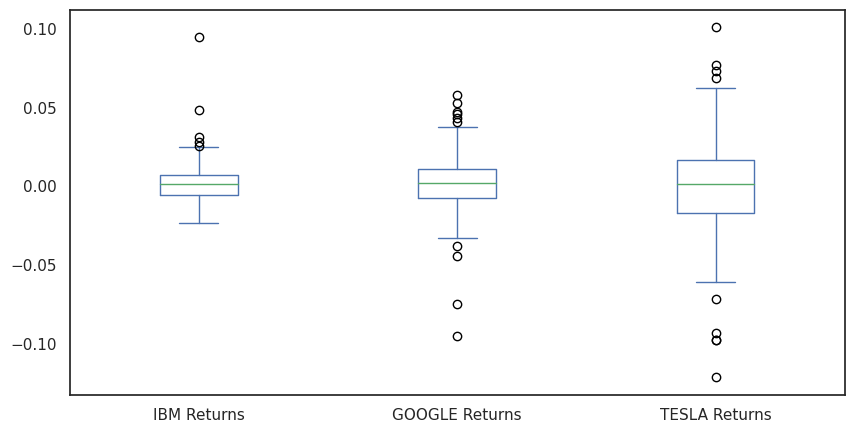

In [183]:
box_df=pd.concat([ibm['Returns'], google['Returns'], tesla['Returns']], axis=1)
box_df.columns=['IBM Returns', 'GOOGLE Returns', 'TESLA Returns']
box_df.plot(kind='box', figsize=(10,5));

# Plotly

###Google Stock Price - High vs Low

In [184]:
import plotly.graph_objects as go

In [185]:
trace_1=go.Scatter(x=google["Date"],
                   y=google["High"],
                   name="Google High Price",
                   line=dict(color='magenta'))
trace_2=go.Scatter(x=google["Date"],
                   y=google["Low"],
                   name="Google Low Price",
                   line=dict(color='blueviolet'))
data=[trace_1, trace_2]

layout=dict(title='Google Stock Price - High vs Low')

fig=go.Figure(data=data, layout=layout)
fig.show()


##Candlestick

In [186]:
fig=go.Figure(data=[go.Candlestick(x=ibm["Date"],
                                   open=ibm["Open"],
                                   close=ibm["Close"],
                                   high=ibm["High"],
                                   low=ibm["Low"])])
fig.update_layout(xaxis_rangeslider_visible=False)

##Area plot

In [187]:
import plotly.express as px

In [188]:
fig=px.area(df,
           x="Date",
           y="Returns", facet_col="Company", facet_col_wrap=1)

fig.show()

#Scatter plot

In [189]:
google['Price_Change']=google['Close'].diff()
google["Abs_Returns"]=google['Returns'].abs()

In [190]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,Returns,Price_Change,Abs_Returns
0,2023-04-10,106.980003,107.589996,105.120003,106.440002,106.440002,27067400,2.895671e+09,NaN,NaN,NaN
1,2023-04-11,106.550003,106.730003,104.680000,105.349998,105.349998,26311800,2.803522e+09,-0.010241,-1.090004,0.010241
2,2023-04-12,106.580002,106.750000,104.339996,104.639999,104.639999,24370300,2.597387e+09,-0.006739,-0.709999,0.006739
3,2023-04-13,105.839996,107.489998,105.839996,107.430000,107.430000,24843600,2.629447e+09,0.026663,2.790001,0.026663
4,2023-04-14,106.889999,108.940002,106.839996,108.870003,108.870003,26578000,2.840922e+09,0.013404,1.440003,0.013404


In [191]:
google=google.dropna()

In [192]:
fig=px.scatter(google,
           x="Volume",
           y="Close",
           size="Abs_Returns",
           color="Price_Change",
           color_continuous_scale=['red', 'lightgray', 'green'],
           hover_data=["Date", "Returns", "Price_Change"],
           title='Scatter Plot of Google Volume, Close, Returns and Price Change')
fig.update_layout(xaxis_title="Volume", yaxis_title="Close")


####This scatter plot visualizes the relationship between trading volume and closing price of Google stock. The size of each point represents the absolute value of daily returns, while the color indicates the direction and magnitude of price changes (negative values in red, positive values in green).

##Animated plot

In [193]:
tesla['Company'] = 'Tesla'
google['Company'] = 'Google'
ibm['Company'] = 'IBM'

In [201]:
df=pd.concat([ibm, google, tesla])
fig=px.scatter(df,
           x='Volume',
           y='Close',
           animation_group='Company',
           animation_frame='Date',
           color='Company',
           hover_name='Company',
           title='Animated Plot of Stock Prices',
           range_x=[0,211797100],
           range_y=[30,500])

fig.update_layout(legend_title='Company')
fig.update_layout(xaxis_title='Volume', yaxis_title='Close Price')